In [1]:
from patchedimage import PatchedImage
from utilities import *

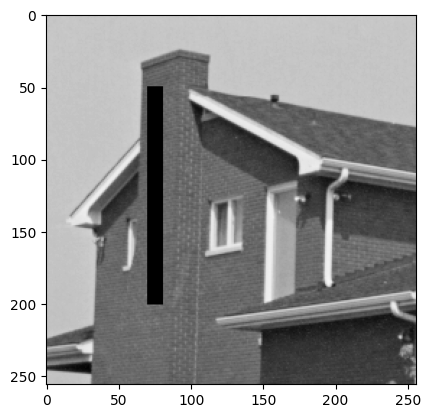

In [2]:
imgp = PatchedImage("images/maison.tif",4)
#imgp.set_masque(masque_circulaire((50,50),15,imgp.img.shape))
x0,x1,y0,y1 = 70,80,50,200
imgp.set_masque(masque_carre((y0,x0),(y1,x1),imgp.img.shape),leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
#imgp.set_priorities()
imgp.show_img()

In [8]:
for j in range(x0,x1):
    for i in range(y0,y1):
        imgp.reconstruction((i,j))

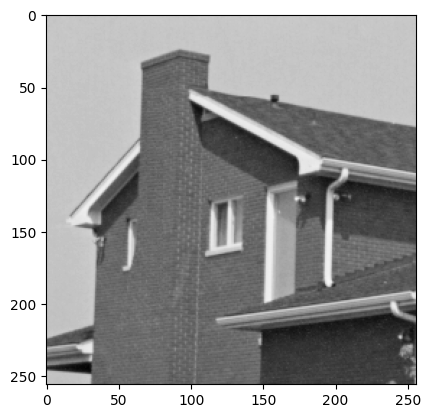

In [9]:
imgp.show_img()